In [61]:
# Importamos el CSV
import pandas as pd

df = pd.read_csv('bookings.csv')

In [62]:
# Visualizamos las primeras filas
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [63]:
# Vemos sus dimensiones
df.shape

(119390, 32)

In [64]:
# Vemos sus tipos de datos
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [65]:
# Vamos a ver el ratio de cancelados
df['is_canceled'].value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [66]:
# Vemos el ratio de cancelaciones por hotel
canceled = df.groupby('hotel')['is_canceled'].value_counts(normalize=True)

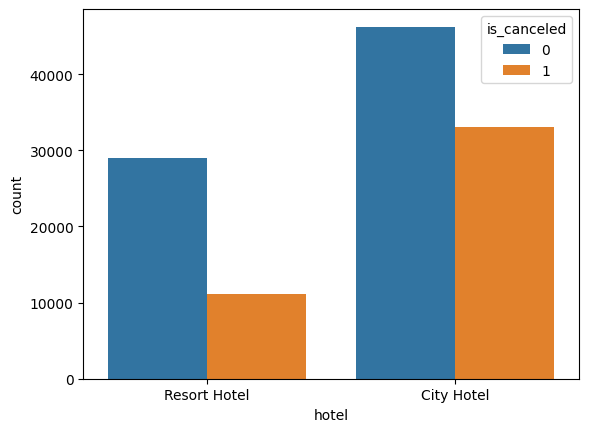

Ratio de cancelación de resort hotel:  27.76 %
Ratio de cancelación de city hotel:  41.73 %


In [67]:
# Ratio de cancelación por los tipos de hotel
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.show()

print('Ratio de cancelación de resort hotel: ', round(canceled['Resort Hotel'][1]*100,2), '%')

print('Ratio de cancelación de city hotel: ', round(canceled['City Hotel'][1]*100,2), '%')

# Preprocesamiento

In [68]:
# Vemos sus tipos de datos
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [69]:
# Vemos la correlación entre las variables
df.corr()

/tmp/ipykernel_40511/3896492125.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


In [70]:
# Decidido quitar todas aquellas que están por debajo del 0.2
df.drop(['is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'adults', 'children', 'babies', 'agent', 'adr', 'stays_in_week_nights', 'company'], axis=1, inplace=True)

In [71]:
# Veo de nuevo la correlación
df.corr()

/tmp/ipykernel_40511/2014202800.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,is_canceled,lead_time,total_of_special_requests
is_canceled,1.000000,0.293123,-0.234658
lead_time,0.293123,1.000000,-0.095712
total_of_special_requests,-0.234658,-0.095712,1.000000


In [72]:
# Muestro las columnas
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,1,Check-Out,2015-07-03


In [73]:
# Vemos los valores vacíos
df.isnull().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_month             0
meal                           0
country                      488
market_segment                 0
distribution_channel           0
reserved_room_type             0
assigned_room_type             0
deposit_type                   0
customer_type                  0
total_of_special_requests      0
reservation_status             0
reservation_status_date        0
dtype: int64

In [74]:
# Vemos los valores de country
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [75]:
# A country le asigno el valor más frecuente
df['country'].fillna('PRT', inplace=True)

In [76]:
# Vemos los valores vacíos
df.isnull().sum()

hotel                        0
is_canceled                  0
lead_time                    0
arrival_date_month           0
meal                         0
country                      0
market_segment               0
distribution_channel         0
reserved_room_type           0
assigned_room_type           0
deposit_type                 0
customer_type                0
total_of_special_requests    0
reservation_status           0
reservation_status_date      0
dtype: int64

In [77]:
# Vemos los tipos de datos
df.dtypes

hotel                        object
is_canceled                   int64
lead_time                     int64
arrival_date_month           object
meal                         object
country                      object
market_segment               object
distribution_channel         object
reserved_room_type           object
assigned_room_type           object
deposit_type                 object
customer_type                object
total_of_special_requests     int64
reservation_status           object
reservation_status_date      object
dtype: object

In [80]:
# Cambio el tipo de dato de la columna reservation_status_date a datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

/tmp/ipykernel_40511/3079098901.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

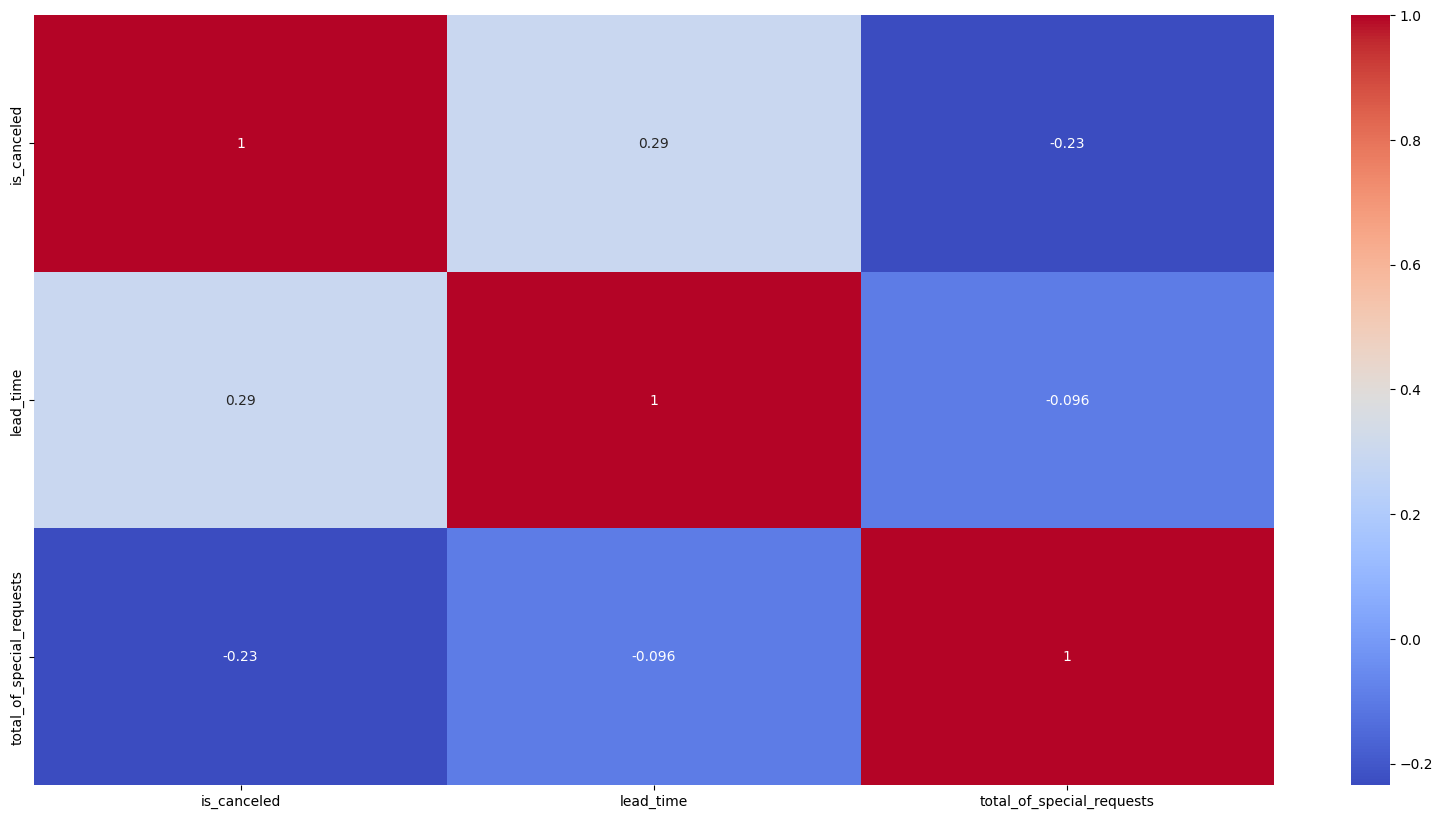

In [81]:
# Vemos la correlación entre las variables con la variable que queremos predecir
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [82]:
# Veo los tipos de datos
df.dtypes

hotel                                object
is_canceled                           int64
lead_time                             int64
arrival_date_month                   object
meal                                 object
country                              object
market_segment                       object
distribution_channel                 object
reserved_room_type                   object
assigned_room_type                   object
deposit_type                         object
customer_type                        object
total_of_special_requests             int64
reservation_status                   object
reservation_status_date      datetime64[ns]
dtype: object

In [83]:
# Vemos las columnas categoricas
df.select_dtypes(include=['object']).columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

In [84]:
# Vemos las columnas numericas
df.select_dtypes(include=['int64', 'float64', 'datetime64']).columns

Index(['is_canceled', 'lead_time', 'total_of_special_requests',
       'reservation_status_date'],
      dtype='object')

In [85]:
# Las juntos las columnas

categorical_features_names = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status']
print(f"Propiedades categóricas: {categorical_features_names} ({len(categorical_features_names)})")
numerical_features_names = ['lead_time', 'total_of_special_requests']
print(f"Propiedades numéricas: {numerical_features_names} ({len(numerical_features_names)})")

all_features_names = categorical_features_names + numerical_features_names
target = 'is_canceled'

Propiedades categóricas: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status'] (11)
Propiedades numéricas: ['lead_time', 'total_of_special_requests'] (2)


/tmp/ipykernel_40511/4123134450.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[numerical_features_names].hist(ax=plt.figure(figsize=(20, 20)).gca())


array([[<Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'total_of_special_requests'}>]],
      dtype=object)

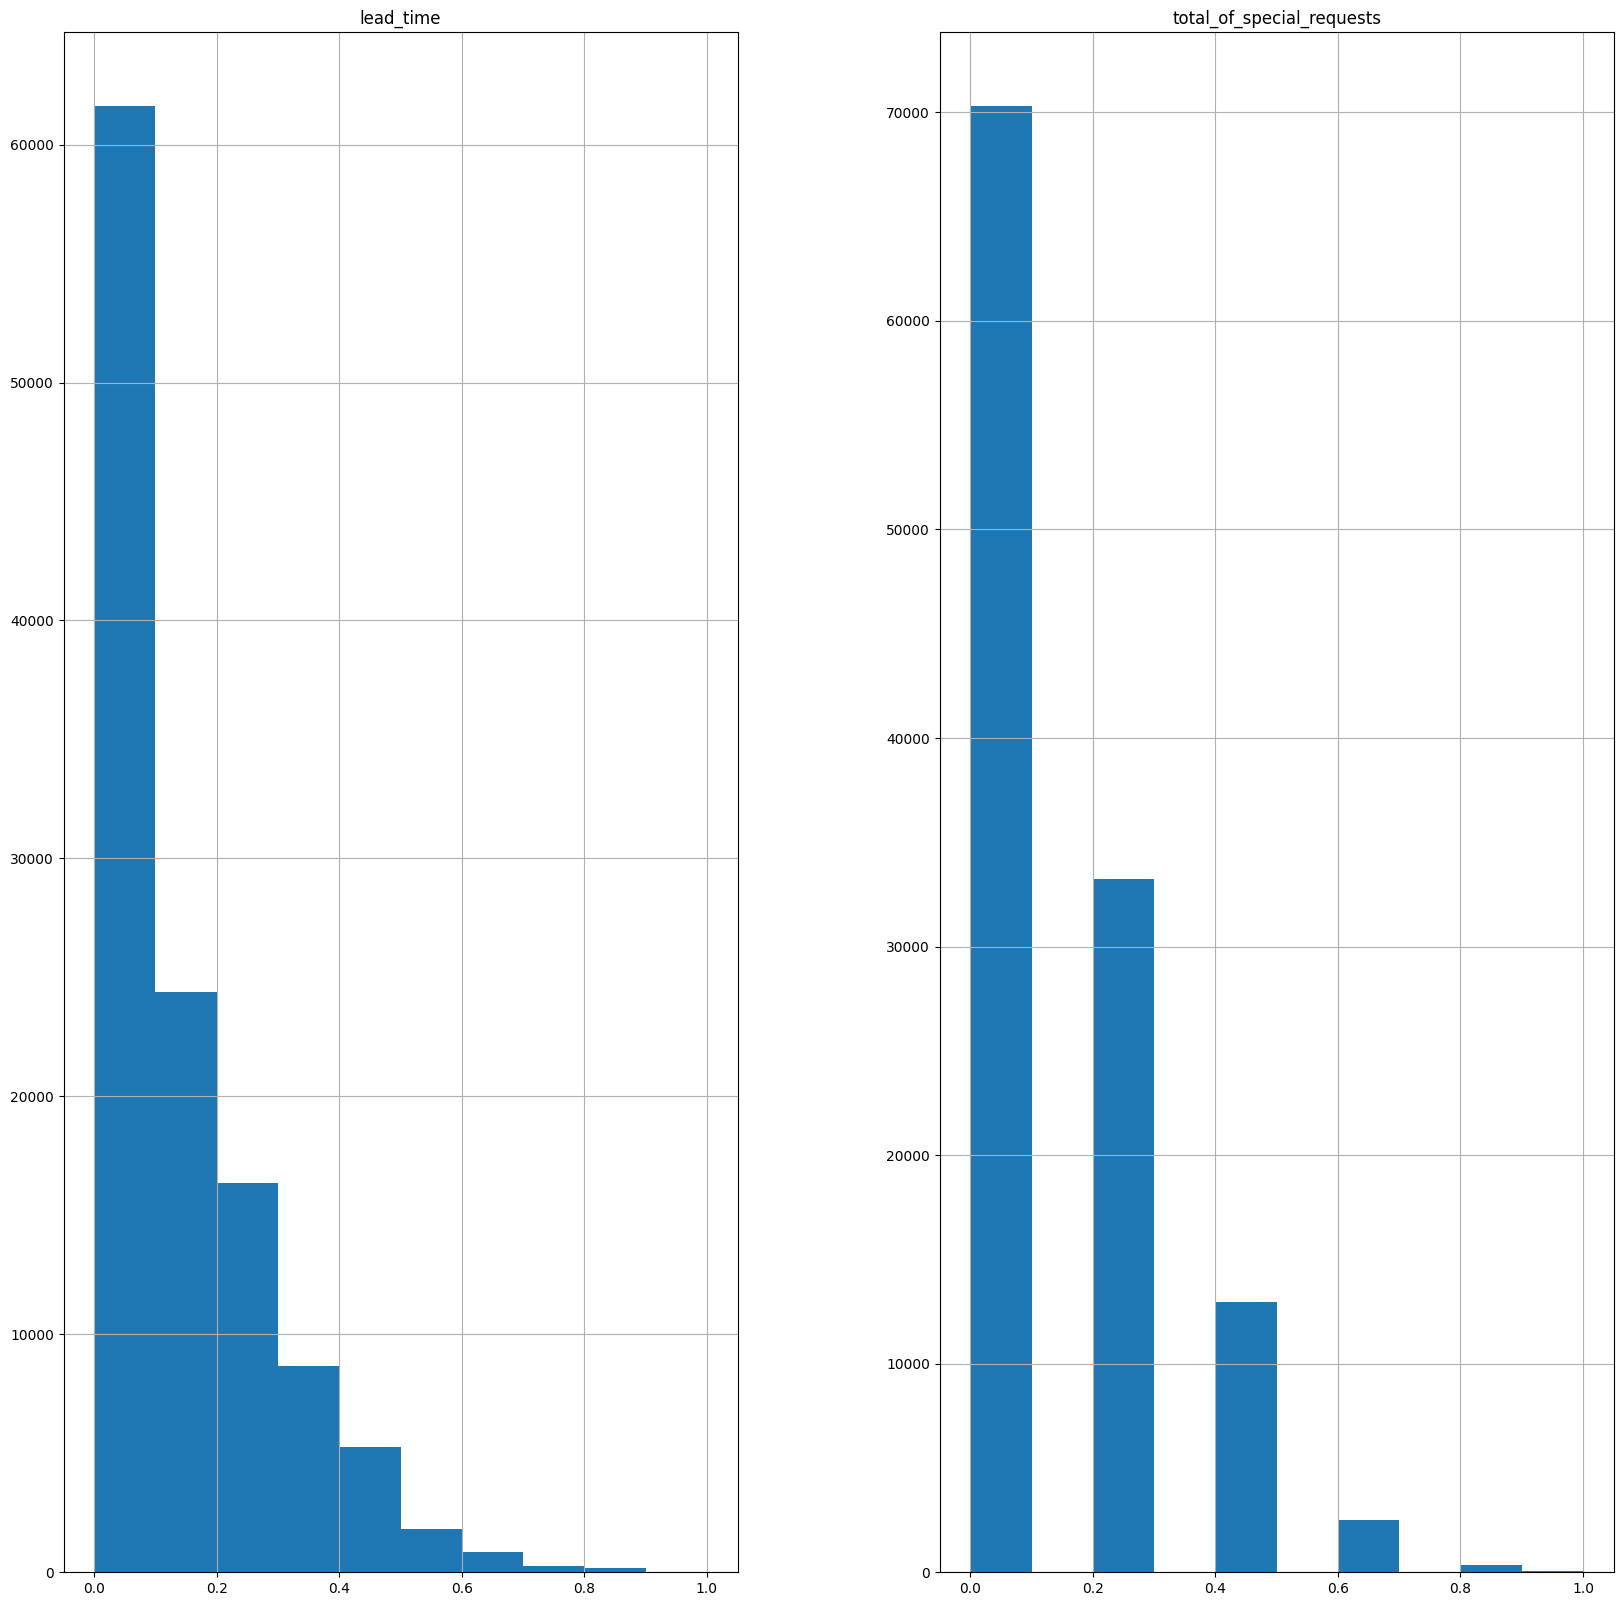

In [86]:
# Hago el escalado de datos

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_features_names] = scaler.fit_transform(df[numerical_features_names])
df[numerical_features_names].hist(ax=plt.figure(figsize=(20, 20)).gca())

In [87]:
# Entrenamiento y test
from sklearn.model_selection import train_test_split

X = df[all_features_names]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Realizo el OneHotEncoding

In [88]:
train_dict = X_train[all_features_names].to_dict(orient='records')
dict(sorted(train_dict[0].items()))

{'arrival_date_month': 'October',
 'assigned_room_type': 'A',
 'country': 'CHE',
 'customer_type': 'Contract',
 'deposit_type': 'No Deposit',
 'distribution_channel': 'TA/TO',
 'hotel': 'City Hotel',
 'lead_time': 0.029850746268656712,
 'market_segment': 'Online TA',
 'meal': 'BB',
 'reservation_status': 'Check-Out',
 'reserved_room_type': 'A',
 'total_of_special_requests': 0.4}

In [89]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [90]:
dv.get_feature_names_out()

array(['arrival_date_month=April', 'arrival_date_month=August',
       'arrival_date_month=December', 'arrival_date_month=February',
       'arrival_date_month=January', 'arrival_date_month=July',
       'arrival_date_month=June', 'arrival_date_month=March',
       'arrival_date_month=May', 'arrival_date_month=November',
       'arrival_date_month=October', 'arrival_date_month=September',
       'assigned_room_type=A', 'assigned_room_type=B',
       'assigned_room_type=C', 'assigned_room_type=D',
       'assigned_room_type=E', 'assigned_room_type=F',
       'assigned_room_type=G', 'assigned_room_type=H',
       'assigned_room_type=I', 'assigned_room_type=K',
       'assigned_room_type=L', 'assigned_room_type=P', 'country=ABW',
       'country=AGO', 'country=AIA', 'country=ALB', 'country=AND',
       'country=ARE', 'country=ARG', 'country=ARM', 'country=ASM',
       'country=ATA', 'country=AUS', 'country=AUT', 'country=AZE',
       'country=BEL', 'country=BEN', 'country=BFA', 'country=B

In [97]:
# Entreno el modelo
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(60, kernel_initializer='uniform', activation='relu'))
model.add(Dense(110, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

2023-03-12 21:25:30.012036: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 21:25:30.224258: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-12 21:25:30.224309: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-12 21:25:31.334548: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [98]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [103]:
model.fit(X_train, y_train, epochs=10, batch_size=6000)

Epoch 1/10
16/16 [==============================] - 1s 36ms/step - loss: 1.1567e-09 - accuracy: 1.0000
Epoch 2/10
16/16 [==============================] - 1s 33ms/step - loss: 1.1571e-09 - accuracy: 1.0000
Epoch 3/10
16/16 [==============================] - 1s 39ms/step - loss: 1.1575e-09 - accuracy: 1.0000
Epoch 4/10
16/16 [==============================] - 1s 35ms/step - loss: 1.1578e-09 - accuracy: 1.0000
Epoch 5/10
16/16 [==============================] - 1s 33ms/step - loss: 1.1581e-09 - accuracy: 1.0000
Epoch 6/10
16/16 [==============================] - 1s 33ms/step - loss: 1.1585e-09 - accuracy: 1.0000
Epoch 7/10
16/16 [==============================] - 0s 29ms/step - loss: 1.1589e-09 - accuracy: 1.0000
Epoch 8/10
16/16 [==============================] - 1s 33ms/step - loss: 1.1592e-09 - accuracy: 1.0000
Epoch 9/10
16/16 [==============================] - 0s 30ms/step - loss: 1.1595e-09 - accuracy: 1.0000
Epoch 10/10
16/16 [==============================] - 1s 33ms/step - loss: